In [150]:
import pandas as pd


In [ ]:
data=pd.read_csv("data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [153]:
data.drop("id",axis=1, inplace=True)

In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [155]:
data.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [156]:
X=data.drop("diagnosis",axis=1)
y=data["diagnosis"]

In [157]:
X.shape

(569, 30)

In [158]:
y.shape

(569,)

In [159]:
from sklearn.preprocessing import StandardScaler,Normalizer,LabelEncoder
encoder=LabelEncoder()
y=encoder.fit_transform(y)



In [160]:
from sklearn.model_selection import train_test_split
X_train ,X_test,y_train ,_y_test=train_test_split(X,y,train_size=0.9,random_state=0)


In [161]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [162]:
X_train.shape

(512, 30)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
classifier_model=Sequential()
classifier_model.add(Dense(16,activation="relu",kernel_initializer="uniform",input_dim=30))
classifier_model.add(Dropout(rate=0.2))
classifier_model.add(Dense(units=16,activation="relu",kernel_initializer="uniform"))
classifier_model.add(Dropout(rate=0.1))
classifier_model.add(Dense(units=16,activation="relu",kernel_initializer="uniform"))
classifier_model.add(Dense(16,activation="relu",kernel_initializer="uniform"))
classifier_model.add(Dropout(rate=0.1))
classifier_model.add(Dense(1,activation="sigmoid",kernel_initializer="uniform"))
classifier_model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])


d:\programming\artifical intelligance\Programs\anacondaInstall\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [164]:
history=classifier_model.fit(X_train,y_train,batch_size=64,epochs=150,validation_split=0.2)


Epoch 1/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.6334 - loss: 0.6929 - val_accuracy: 0.6019 - val_loss: 0.6924
Epoch 2/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6310 - loss: 0.6919 - val_accuracy: 0.6019 - val_loss: 0.6916
Epoch 3/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6197 - loss: 0.6910 - val_accuracy: 0.6019 - val_loss: 0.6906
Epoch 4/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6408 - loss: 0.6893 - val_accuracy: 0.6019 - val_loss: 0.6891
Epoch 5/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6394 - loss: 0.6873 - val_accuracy: 0.6019 - val_loss: 0.6866
Epoch 6/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6625 - loss: 0.6826 - val_accuracy: 0.6019 - val_loss: 0.6818
Epoch 7/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6432 - loss: 0.6769 - val_accuracy: 0.6019 - val_loss: 0.6721
Epoch 8/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6370 - loss: 0.6642 - val_accuracy: 0.6019 - val_loss:

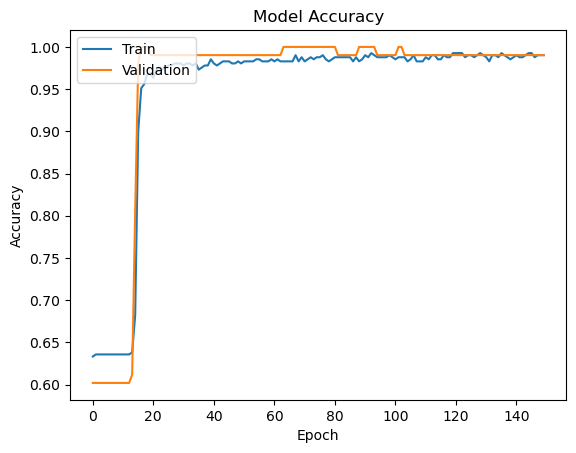

In [165]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [166]:
y_pred = classifier_model.predict(X_test)   # 0 - 1
y_pred = (y_pred >= 0.5)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


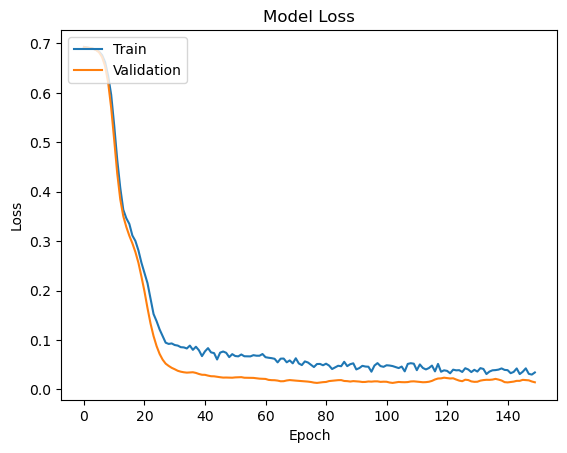

In [167]:
plt.plot(history.history['loss']) # Access history from the 'history' object
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.96      1.00      0.98        22

    accuracy                           0.98        57
   macro avg       0.98      0.99      0.98        57
weighted avg       0.98      0.98      0.98        57



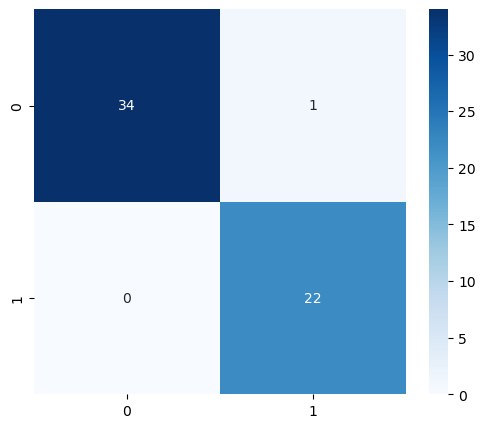

In [168]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
print(classification_report(_y_test, y_pred))
cm = confusion_matrix(_y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, cmap="Blues", annot=True, fmt='g')
plt.show()